In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
# excercise with help of resources from Manuel Amunategui - https://github.com/amunategui

In [2]:
def clean_columns(df):
    snake_and_clean_columns = []
    for col in df.columns:
        col = col.replace(' ', '')
        col = col.replace('.', '')
        snake_and_clean_columns.append(re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower())
    df.columns = snake_and_clean_columns
    return df

### S&P 500 Index

The S&P 500,[6] or just the S&P,[7][8] is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States.
### S&P 500 Companies by Weight (23.02.2020):
- Microsoft Corporation (5%)
- Apple Inc. (4.8%)
- Amazon.com (3.2%)
- Facebook (1.85%)
- Google Class A (1.63%)
- Google Class C (1.62%)

### Create dataframe (^GSPC)

In [3]:
sp_500_df = pd.read_csv('^GSPC.csv')
sp_500_df = clean_columns(sp_500_df)
sp_500_df['date'] = pd.to_datetime(sp_500_df['date'])
sp_500_df = sp_500_df.sort_values('date', ascending=True)
sp_500_df.tail(2)

,date,open,high,low,close,adj_close,volume
23142,2020-02-20,3380.449951,3389.149902,3341.020020,3373.22998,3373.22998,4007320000
23143,2020-02-21,3360.500000,3360.760010,3328.449951,3337.75000,3337.75000,3899270000


### Amazon.com, Inc. Common Stock

### Create dataframe (AMZN)

The S&P 500,[6] or just the S&P,[7][8] is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States.

In [4]:
amzn_df = pd.read_csv('AMZN.csv')
amzn_df = clean_columns(amzn_df)
amzn_df['date'] = pd.to_datetime(amzn_df['date'])
amzn_df = amzn_df.sort_values('date', ascending=True)
amzn_df.tail(2)

,date,open,high,low,close,adj_close,volume
5728,2020-02-20,2173.070068,2176.790039,2127.449951,2153.100098,2153.100098,3131300
5729,2020-02-21,2142.149902,2144.550049,2088.000000,2095.969971,2095.969971,4646300


### Checking the minimum and maximum ranges of dates

In [5]:
print('S&P500: ', np.min(sp_500_df['date'] ),np.max(sp_500_df['date'] ))
print('AMZN: ', np.min(amzn_df['date'] ),np.max(amzn_df['date'] ))

S&P500:  1927-12-30 00:00:00 2020-02-21 00:00:00
AMZN:  1997-05-15 00:00:00 2020-02-21 00:00:00


### Plotting and looking for divergence

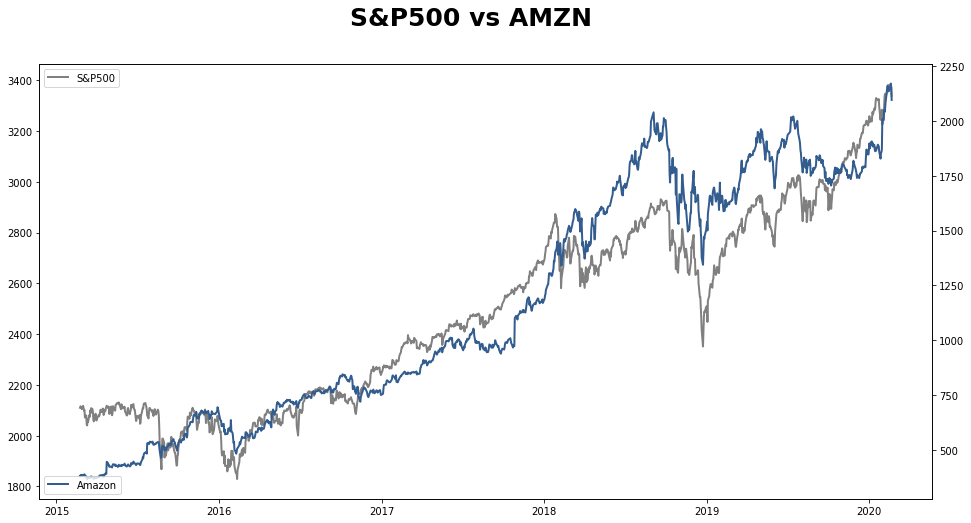

In [6]:
start_date = "2015-02-21"
end_date = "2020-02-21"

sp_500_df_tmp = sp_500_df.copy()
amzn_df_tmp = amzn_df.copy()

sp_500_df_tmp = sp_500_df_tmp[(sp_500_df_tmp['date'] >= start_date) & (sp_500_df_tmp['date'] <= end_date)]
amzn_df_tmp = amzn_df_tmp[(amzn_df_tmp['date'] >= start_date) & (amzn_df_tmp['date'] <= end_date)]


fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(sp_500_df_tmp['date'], 
         sp_500_df_tmp['adj_close'],
         color='gray', 
         linewidth=2,
         label='S&P500')
plt.legend(loc='upper left')
fig.suptitle('S&P500 vs AMZN', fontsize=25, fontweight='bold')

ax.twinx()
plt.plot(amzn_df_tmp['date'],  
         amzn_df_tmp['adj_close'] , 
         color='#345d8f', 
         linewidth=2,
         label='Amazon')
plt.legend(loc='lower left') 

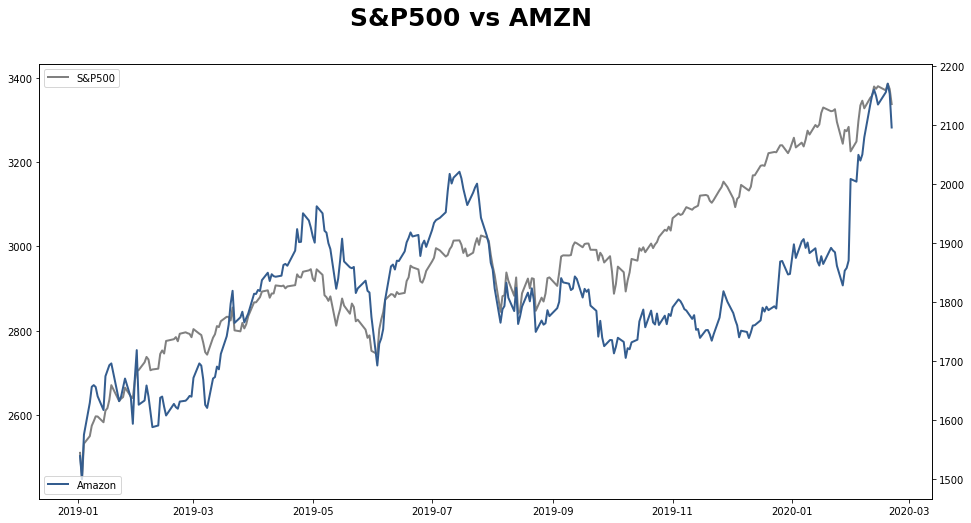

In [7]:
start_date = "2019-01-01"
end_date = "2020-02-21"

sp_500_df_tmp = sp_500_df.copy()
amzn_df_tmp = amzn_df.copy()

sp_500_df_tmp = sp_500_df_tmp[(sp_500_df_tmp['date'] >= start_date) & (sp_500_df_tmp['date'] <= end_date)]
amzn_df_tmp = amzn_df_tmp[(amzn_df_tmp['date'] >= start_date) & (amzn_df_tmp['date'] <= end_date)]


fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(sp_500_df_tmp['date'], 
         sp_500_df_tmp['adj_close'],
         color='gray', 
         linewidth=2,
         label='S&P500')
plt.legend(loc='upper left')
fig.suptitle('S&P500 vs AMZN', fontsize=25, fontweight='bold')

ax.twinx()
plt.plot(amzn_df_tmp['date'],  
         amzn_df_tmp['adj_close'] , 
         color='#345d8f', 
         linewidth=2,
         label='Amazon')
plt.legend(loc='lower left') 

### Merge timeseries

In [8]:
start_date = "2019-01-01"
end_date = "2020-02-21"

sp_500_df_tmp = sp_500_df[['date', 'adj_close']]
sp_500_df_tmp.columns = ['date', 'sp500_adj_close']

amzn_df_tmp = amzn_df[['date', 'adj_close']]
amzn_df_tmp.columns = ['date', 'amzn_adj_close']

merged_df = pd.merge(sp_500_df_tmp, 
                     amzn_df_tmp, 
                     on=['date'], 
                     how='left')

merged_df = merged_df.fillna(method='ffill')
merged_df = merged_df.dropna(axis=0)
merged_df.head(2)

,date,sp500_adj_close,amzn_adj_close
17414,1997-05-15,841.880005,1.958333
17415,1997-05-16,829.750000,1.729167


### Checking correlation

In [9]:
merged_df['sp500_adj_close'].corr(merged_df['amzn_adj_close'])

0.9290580513666137

### Chcecking correlation for period 09.2019 to 01.2010

In [10]:
start_date = "2019-09-01"
end_date = "2020-01-01"

merged_df_tmp = merged_df.copy()
merged_df_tmp = merged_df_tmp[(merged_df_tmp['date'] >= start_date) & (merged_df_tmp['date'] <= end_date)]
merged_df_tmp['sp500_adj_close'].corr(merged_df_tmp['amzn_adj_close'])

0.32189367951603776

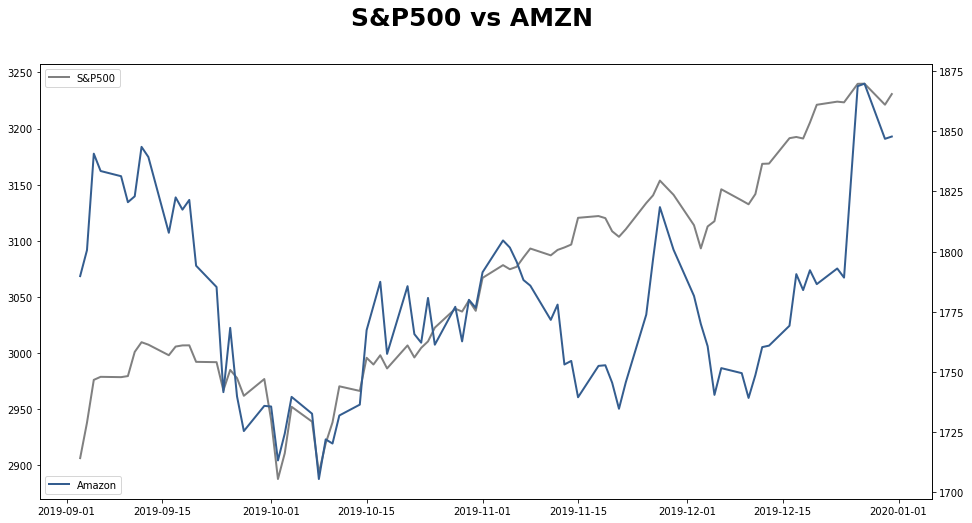

In [11]:
start_date = "2019-09-01"
end_date = "2020-01-01"

sp_500_df_tmp = sp_500_df.copy()
amzn_df_tmp = amzn_df.copy()

sp_500_df_tmp = sp_500_df_tmp[(sp_500_df_tmp['date'] >= start_date) & (sp_500_df_tmp['date'] <= end_date)]
amzn_df_tmp = amzn_df_tmp[(amzn_df_tmp['date'] >= start_date) & (amzn_df_tmp['date'] <= end_date)]


fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(sp_500_df_tmp['date'], 
         sp_500_df_tmp['adj_close'],
         color='gray', 
         linewidth=2,
         label='S&P500')
plt.legend(loc='upper left')
fig.suptitle('S&P500 vs AMZN', fontsize=25, fontweight='bold')

ax.twinx()
plt.plot(amzn_df_tmp['date'],  
         amzn_df_tmp['adj_close'] , 
         color='#345d8f', 
         linewidth=2,
         label='Amazon')
plt.legend(loc='lower left') 